## Examples of use 

In [1]:
from mcda.promethee import PrometheI, PrometheII
import numpy as np

alternatives = np.array(
        [
            [98, 8, 400],
            [58, 0, 800],
            [66, 5, 1000],
            [74, 3, 600],
            [80, 7, 200],
            [82, 10, 600],
        ]
    )
alternatives_names = ["ITA", "BEL", "GER", "SWE", "AUT", "FRA"]

thresholds = {
        "q": np.array([0, 0, 100]),
        "p": np.array([0, 2, 300])
}

preference_types = np.array([1, 1, -1])  # 1 for gain and -1 for cost
weights = np.array([3, 2, 5])
solver = PrometheI()
print(solver.solve(alternatives, preference_types,
                       thresholds, weights, alternatives_names))

[['ITA', 'AUT'], ['FRA'], ['SWE'], ['BEL', 'GER']]


In [2]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

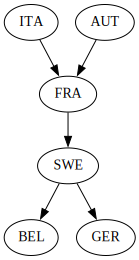

In [3]:
import graphviz

graph = solver.create_graph_graphviz()
graph

In [4]:
solver = PrometheII()
print(solver.solve(alternatives, preference_types,
                       thresholds, weights, alternatives_names))

['ITA', 'AUT', 'FRA', 'SWE', 'GER', 'BEL']


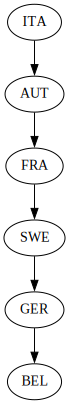

In [5]:
G = solver.create_graph_graphviz()
G

In [6]:
alternatives = np.array(
        [
            [5, 4, 70, 12],
            [4, 1, 54 ,11],
            [5, 0, 71, 17],
            [5, 2 ,60, 15],
            [2, 0, 81, 11],
            [8, 5, 55, 13],
            [3, 2, 97, 19],
            [2, 5, 73, 14]
        ]
    )
alternatives_names = ['a'+str(i) for i in range(1,9)]

thresholds = {
        "q": np.array([0,1,6,2]),
        "p": np.array([5,1,23,4])
}

preference_types = np.array([1, 1, 1,-1])  # 1 for gain and -1 for cost
weights = np.array([0.09, 0.29, 0.25, 0.37])
solver = PrometheI()
ans = solver.solve(alternatives, preference_types,
                       thresholds, weights, alternatives_names)
print(ans)

[['a1'], ['a6', 'a8'], ['a5'], ['a2', 'a7'], ['a4'], ['a3']]


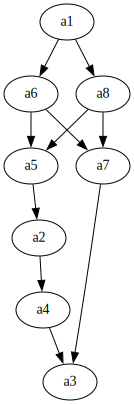

In [7]:
G = solver.create_graph_graphviz()
G

In [8]:
from mcda.electretrib import ElectreTriB
alternatives = np.array(
    [
        [90, 86, 46, 30],
        [40, 90, 14, 48],
        [94, 100, 40, 36],
        [78, 76, 30, 50],
        [60, 60, 30, 30],
        [64, 72, 12, 46],
        [62, 88, 22, 48],
        [70, 30, 12, 12],
    ]
)

profiles = np.array(
    [
        [64, 61, 32, 32],
        [86, 84, 43, 43],
    ]
)

thresholds = {
    "q": np.array(
        [
            [2, 2, 0, 0],
            [3, 2, 0, 0]
        ]),
    "p": np.array(
        [
            [6, 5, 2, 2],
            [7, 8, 2, 2]
        ]),
    "v": np.array([
        [20, 24, np.nan, np.nan],
        [20, 25, np.nan, np.nan]
    ])
}

preference_types = np.array([1, 1, 1, 1])  # 1 for gain and -1 for cost
weights = np.array([0.4, 0.3, 0.25, 0.05])
cred_th = 0.65
solver = ElectreTriB()
print(solver.solve(alternatives, preference_types,
                   thresholds, profiles, weights, cred_th, "pessimistic"))

print(solver.solve(alternatives, preference_types,
                   thresholds, profiles, weights, cred_th, "optimistic"))


[3 1 3 2 1 2 2 1]
[3 2 3 2 1 2 2 2]


## Data

In [ ]:
import pandas as pd

data = pd.read_csv("universities_final.csv", index_col=0)
data.head()

,WSK_ocena_p._kadre,ekonom._losy_absolw.,jak._przyj._na_studia,TOP_10,pub._we_wspl._zagr.,distance,progi
id,,,,,,,
B,34.0,78.2,78.2,63.8,51.0,309,0.7835
C,0.8,50.8,56.1,44.7,43.7,132,0.7000
D,3.0,64.7,74.1,7.1,53.6,188,0.7000
E,1.7,74.6,63.2,8.5,17.6,188,0.6800
H,6.5,51.3,61.6,55.3,29.4,375,0.3300


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
alternatives = data.to_numpy().astype(float).round(2)
print(alternatives)

[[3.40e+01 7.82e+01 7.82e+01 6.38e+01 5.10e+01 3.09e+02 7.80e-01]
 [8.00e-01 5.08e+01 5.61e+01 4.47e+01 4.37e+01 1.32e+02 7.00e-01]
 [3.00e+00 6.47e+01 7.41e+01 7.10e+00 5.36e+01 1.88e+02 7.00e-01]
 [1.70e+00 7.46e+01 6.32e+01 8.50e+00 1.76e+01 1.88e+02 6.80e-01]
 [6.50e+00 5.13e+01 6.16e+01 5.53e+01 2.94e+01 3.75e+02 3.30e-01]
 [2.26e+01 8.49e+01 9.04e+01 4.68e+01 6.62e+01 4.13e+02 7.80e-01]
 [4.80e+00 7.24e+01 7.36e+01 5.25e+01 5.82e+01 1.66e+02 7.80e-01]
 [7.00e-01 5.38e+01 5.55e+01 4.47e+01 6.35e+01 3.73e+02 6.00e-01]
 [7.80e+00 4.23e+01 4.67e+01 1.00e+02 7.72e+01 5.60e+01 6.20e-01]
 [1.00e+02 9.92e+01 1.00e+02 4.89e+01 5.10e+01 1.88e+02 9.60e-01]
 [5.40e+01 7.96e+01 7.98e+01 5.18e+01 4.90e+01 1.81e+02 8.60e-01]
 [1.20e+00 8.44e+01 7.28e+01 6.45e+01 4.66e+01 9.80e+01 7.00e-01]
 [1.66e+01 6.37e+01 6.99e+01 4.26e+01 3.98e+01 1.47e+02 6.50e-01]
 [0.00e+00 7.23e+01 5.18e+01 3.97e+01 6.62e+01 2.99e+02 3.50e-01]
 [4.10e+00 4.73e+01 6.31e+01 1.70e+01 1.00e+02 3.55e+02 8.20e-01]
 [1.70e+00

In [ ]:
alternatives_names = data.index.to_list()
print(alternatives_names)

['B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'Y', 'Z']


In [ ]:
thresholds = {
        "q": np.array([0, 0, 0, 0, 0, 0, 0]),
        "p": np.array([0, 0, 0, 0, 0, 0, 0])
}

preference_types = np.array([1, 1, 1, 1, 1, -1, -1])  # 1 for gain and -1 for cost
weights = np.array([1, 1, 1, 1, 1, 1, 1])
solver = PrometheI()
print(solver.solve(alternatives, preference_types,
                       thresholds, weights, alternatives_names))

[['Y'], ['M'], ['B'], ['P'], ['N'], ['Z'], ['L'], ['I'], ['J'], ['Q'], ['D', 'H'], ['R'], ['V'], ['K'], ['E'], ['T'], ['C'], ['W'], ['U']]
